# Project: WeRateDogs data analysis

# Gathering data

In [2]:
import pandas as pd
import numpy as np
import requests
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Downloading programatically using request library and reading into a data frame
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

In [ ]:
# Twitter API
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [3]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# twitter_archive is a DataFrame with the twitter_archive_enhanced.csv file.
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
df_list= []
with open('tweet-json.txt', encoding='utf-8') as myfile:
    for line in myfile:
        data= json.loads(line)
        
        tweet_id = data['id'] 
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']

        df_dict= {'tweet_id': tweet_id,'retweet_count': retweet_count,'favorite_count': favorite_count}

        df_list.append(df_dict)
tweet_json = pd.DataFrame(df_list)

In [4]:
twitter_archive= pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
image = pd.read_csv('image-predictions.tsv', sep= '\t')

# Assessing the twitter_archive

In [6]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [8]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
twitter_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

### Quality Issues

#### Twitter_archive
1. Name column contains invalid values stored as None, the,and a etc. 
2. Null objects are represented as None in several columns
3. Some of the tweet are not actual tweet but are reply or retweet
4. Extract from "source" the medium/device in which the tweet were retweet from
5. Extract "rating" from the "text" column
6. Columns that are not needed such as "in_reply_to_status_id", "in_reply_to_user_id", "text", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp", "expanded_urls", should be deleted
7. Time stamp is object instead of date time

# Assessing the image dataset

In [10]:
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
image.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [12]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Quality Issues

#### image

1. Incomplete data set i.e 2075 available instead of 2356

### Tidiness Issues

##### image

1. Dog stages are in multiple columns

# Assessing the Tweet_df dataset

In [28]:
tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [29]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [30]:
tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [31]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality Issues

#### Twitter_archive
1. Name column contains invalid values stored as None, the,and a etc. 
2. Null objects are represented as None in several columns
3. Some of the tweet are not actual tweet but are reply or retweet
4. Extract from "source" the medium/device in which the tweet were retweet from
5. Extract "rating" from the "text" column
6. Columns that are not needed such as "in_reply_to_status_id", "in_reply_to_user_id", "text", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp", "expanded_urls", should be deleted
7. Time stamp is object instead of date time

#### image

8. Incomplete data set i.e 2075 available instead of 2356


### Tidiness Issues

##### image

1. Dog stages are in multiple columns
2. Combine the three data sets

# Cleaning Dataset 

In [8]:
# Make a copy of every data
twitter_archive_clean = twitter_archive.copy()
image_clean = image.copy()
tweet_clean = tweet_json.copy()

### Quality Issues

#### Twitter_archive

##### Define
Non names such as a in the data set will be fixed

##### Code

In [9]:
def name(dog_name):
    if dog_name["name"] == "a":
        call_dog = dog_name["text"]
        
        dog_list = call_dog.split()
        
        name = "None"
        
        if "named" in dog_list:
            name_dog = dog_list.index("named") + 1
            name = dog_list[name_dog]
            
        elif "name is" in dog_list:
            name_dog = dog_list.index("name") +2 
            name = dog_list[name_dog]
        dog_name["name"] = name.replace(".", "")
    return dog_name

twitter_archive_clean = twitter_archive_clean.apply(name, axis=1)

##### Test

In [10]:
twitter_archive_clean.name.value_counts()

None          781
Charlie        12
Oliver         11
Cooper         11
Lucy           11
             ... 
Bayley          1
Meatball        1
Storkson        1
Remy            1
Christoper      1
Name: name, Length: 972, dtype: int64

##### Define
Replacing None with Nan

##### Code

In [11]:
twitter_archive_clean.replace(to_replace="None", value=np.nan, inplace=True)

##### Test

In [12]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN,NaN,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN,NaN,NaN,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN,NaN,NaN,NaN


##### Define 
Extract retweet from "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id","retweeted_status_user_id","retweeted_status_timestamp"

##### Code

In [13]:
replies= twitter_archive_clean[pd.notnull(twitter_archive_clean['in_reply_to_status_id'])].index
replies_2= twitter_archive_clean[pd.notnull(twitter_archive_clean['retweeted_status_id'])].index

In [14]:
twitter_archive_clean.drop(replies, axis=0, inplace= True)
twitter_archive_clean.drop(replies_2, axis=0, inplace= True)

##### Test

In [15]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        1458 non-null   object 
 13  doggo                       83 no

##### Define 
Extract from "source" the medium/device in which the tweet were retweet from

##### Code

In [16]:
twitter_archive_clean['source']= twitter_archive_clean['source'].str.extract('^<a.+>(.+)</a>$')

##### Test

In [17]:
twitter_archive_clean['source'].value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

##### Define
Extract "rating" from the "text" column

##### Code

In [18]:
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['text'].str.extract('(\d+\.*\d*\/\d+)', expand=False).str.split('/').str[0]

##### Text

In [21]:
twitter_archive_clean['rating_numerator'].sample(10)

1171    10
1214    12
398     12
1938     3
1089    10
1076     9
2138    10
2306    10
1302    12
43      12
Name: rating_numerator, dtype: object

##### Define
Dropping Columns that i will not be needing such as "in_reply_to_status_id", "in_reply_to_user_id", "text", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp", "expanded_urls", should be deleted

##### Code

In [22]:
twitter_archive_clean = twitter_archive_clean.drop(["in_reply_to_status_id", "in_reply_to_user_id", "text", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp", "expanded_urls"], axis=1)

In [23]:
twitter_archive_clean

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,12,10,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,Twitter for iPhone,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,2015-11-16 00:04:52 +0000,Twitter for iPhone,6,10,NaN,NaN,NaN,NaN,NaN
2353,666033412701032449,2015-11-15 23:21:54 +0000,Twitter for iPhone,9,10,NaN,NaN,NaN,NaN,NaN
2354,666029285002620928,2015-11-15 23:05:30 +0000,Twitter for iPhone,7,10,NaN,NaN,NaN,NaN,NaN


#### Define 
Change the timestamp from object to a date time

##### Code

In [24]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

##### Test

In [25]:
twitter_archive_clean.timestamp.dtype

datetime64[ns, UTC]

##### Define
Renaming the id column in tweet_json to tweet_id

##### code

In [26]:
# renaming the id colum in tweet_df to tweet_id
tweet_clean.rename(columns = {"id": "tweet_id"}, inplace=True)

##### Test

In [27]:
tweet_clean

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


# Tidiness

#####  Define
Cobine dog stages into one column

##### Code

In [28]:
twitter_archive_clean['dog_stage'] = 'None'

# Function that will be applied to each row (changes dog_stage value)
def dog_function(dog):
    
    dog_stage = []
    
    # if function
    if dog['doggo'] == 'doggo':
        dog_stage.append('doggo')
    if dog['floofer'] == 'floofer':
        dog_stage.append('floofer')
    if dog['pupper'] == 'pupper':
        dog_stage.append('pupper')
    if dog['puppo'] == 'puppo':
        dog_stage.append('puppo')
        
    if len(dog_stage) < 1:
        dog['dog_stage'] = 'None'
    else: 
        dog['dog_stage'] = ','.join(dog_stage)
    
    return dog
twitter_archive_clean = twitter_archive_clean.apply(dog_function, axis=1)

# drop the other three dog stages
twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

##### Test

In [29]:
twitter_archive_clean

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,12,10,Franklin,None
...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,5,10,NaN,None
2352,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,6,10,NaN,None
2353,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,9,10,NaN,None
2354,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,7,10,NaN,None


##### Define
Merge the three data sets together and drop missing data

##### Code

In [30]:
# Merging the three data sets together
process_data = pd.merge(twitter_archive_clean, image_clean, how="left", on=["tweet_id"])
final_data= pd.merge(process_data, tweet_clean, how="left", on=["tweet_id"])

##### Test

In [31]:
final_data

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,5,10,NaN,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,41,111
2093,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,6,10,NaN,None,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,147,311
2094,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,9,10,NaN,None,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,47,128
2095,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,7,10,NaN,None,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,48,132


##### Store

In [32]:
# Save clean dataframe to csv
final_data.to_csv('twitter_archive_master.csv', index=False)

## Exploratory Data Analysis

Now that I've trimmed and cleaned my data, I will be moving on to exploration. I'm  going to be using visualizations to answer some question that i posed below. 

In [33]:
final_data.head()

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


In [34]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   rating_numerator    2097 non-null   object             
 4   rating_denominator  2097 non-null   int64              
 5   name                1458 non-null   object             
 6   dog_stage           2097 non-null   object             
 7   jpg_url             1971 non-null   object             
 8   img_num             1971 non-null   float64            
 9   p1                  1971 non-null   object             
 10  p1_conf             1971 non-null   float64            
 11  p1_dog              1971 non-null   object             
 12  p2                  1971 non-null 

### Research Question 1 (Which name is mostly use to name a dog !)

In [35]:
dog_name = final_data.name.value_counts()[:5]

In [36]:
dog_name

Charlie    11
Lucy       11
Cooper     10
Oliver     10
Tucker      9
Name: name, dtype: int64

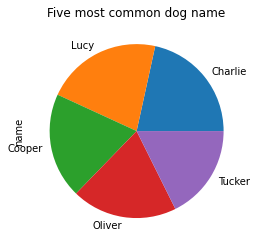

In [37]:
dog_name.plot.pie(title="Five most common dog name");

### Insight 
The 5 most common dog names are 
- Charlie
- Lucy
- Cooper
- Oliver
- Tucker

### Research Question 2 ( The five most common breed of dogs !)

In [38]:
dog = final_data.p1.value_counts()[:5]
dog

golden_retriever      137
Labrador_retriever     94
Pembroke               88
Chihuahua              78
pug                    54
Name: p1, dtype: int64

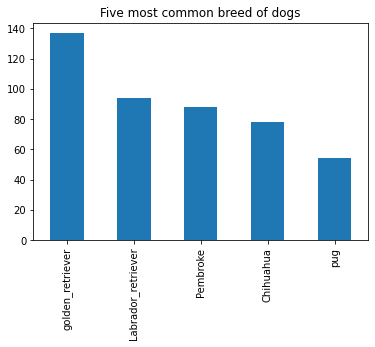

In [39]:
dog.plot.bar(title="Five most common breed of dogs",);

### Insight
The five most common breed of dogs are 
- Welsh_springer_spaniel
- Golden_retriever
- Labrador_retriever
- Pembroke
- Chihuahua

### Research Question 3 ( What type of phone was use to tweet the most !)

In [40]:
final_source_clean = final_data.groupby("source").count();
final_source_clean

,tweet_id,timestamp,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
source,,,,,,,,,,,,,,,,,,,
TweetDeck,11,11,11,11,10,11,11,11,11,11,11,11,11,11,11,11,11,11,11
Twitter Web Client,31,31,31,31,20,31,28,28,28,28,28,28,28,28,28,28,28,31,31
Twitter for iPhone,1964,1964,1964,1964,1383,1964,1932,1932,1932,1932,1932,1932,1932,1932,1932,1932,1932,1964,1964
Vine - Make a Scene,91,91,91,91,45,91,0,0,0,0,0,0,0,0,0,0,0,91,91


<AxesSubplot:xlabel='source'>

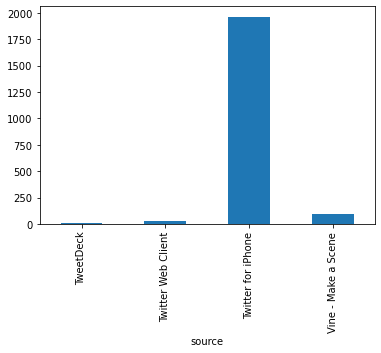

In [41]:
# Bar chart showing twitter source
final_source_clean.tweet_id.plot(kind="bar")

### Insight
- Twitter was accessed through the web, iphone, Vine and tweetDeck
- Twitter for iphone was mostly used by twitter users